     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 70.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 12.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.2/318.2 kB 35.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.1/141.1 kB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 56.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 7.0 MB

Original image shape: (1518, 2578, 3)
Padded image shape: (1536, 2816, 3)
Patched image shape: (6, 11, 1, 256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 738ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━

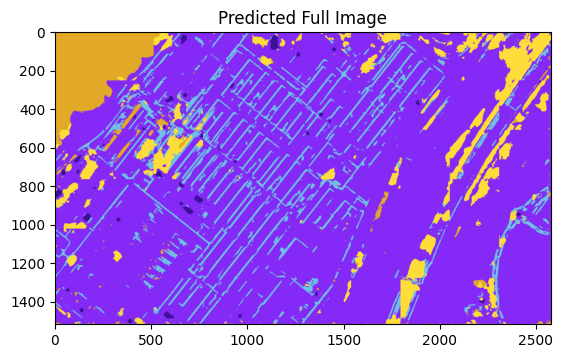

In [9]:
# code for prediction only

from keras.models import load_model
from patchify import patchify, unpatchify
import numpy as np
import cv2
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Define colors for classes
class_building = np.array([60, 16, 152])
class_land = np.array([132, 41, 246])
class_road = np.array([110, 193, 228])
class_vegetation = np.array([254, 221, 58])
class_water = np.array([226, 169, 41])
class_unlabeled = np.array([155, 155, 155])

# Number of classes in your segmentation task
total_classes = 6  # Update this with your total number of classes

# Define custom loss functions
def jaccard_coef(y_true, y_pred):
    smooth = 1e-12
    intersection = K.sum(K.abs(y_true * y_pred), axis=[1,2,3])
    union = K.sum(y_true,[1,2,3])+K.sum(y_pred,[1,2,3])-intersection
    jac = K.mean((intersection + smooth) / (union + smooth), axis=0)
    return jac

def dice_loss(y_true, y_pred):
    smooth = 1e-12
    intersection = K.sum(y_true * y_pred, axis=[1,2,3])
    union = K.sum(y_true, axis=[1,2,3]) + K.sum(y_pred, axis=[1,2,3])
    dice = K.mean((2.0 * intersection + smooth) / (union + smooth), axis=0)
    return 1.0 - dice

def focal_loss(y_true, y_pred, alpha=0.25, gamma=2.0):
    y_pred = K.clip(y_pred, K.epsilon(), 1.0 - K.epsilon())
    ce_loss = -y_true * K.log(y_pred)
    weight = alpha * y_true * K.pow((1 - y_pred), gamma)
    fl_loss = ce_loss * weight
    return K.mean(K.sum(fl_loss, axis=-1))

def total_loss(y_true, y_pred):
    return dice_loss(y_true, y_pred) + (1 * focal_loss(y_true, y_pred))

# Load the pre-trained model
model_path = '/content/satmodel.h5'  # Replace with your model path
model = load_model(model_path, custom_objects={'total_loss': total_loss, 'jaccard_coef': jaccard_coef, 'dice_loss': dice_loss, 'focal_loss': focal_loss})

# MinMaxScaler for normalization
minmaxscaler = MinMaxScaler()

# Function to predict the full image
def predict_full_image(image, patch_size, model):
    original_shape = image.shape
    print(f"Original image shape: {original_shape}")

    # Pad image to make its dimensions divisible by the patch size
    pad_height = (patch_size - image.shape[0] % patch_size) % patch_size
    pad_width = (patch_size - image.shape[1] % patch_size) % patch_size
    image = np.pad(image, ((0, pad_height), (0, pad_width), (0, 0)), mode='constant', constant_values=0)
    padded_shape = image.shape
    print(f"Padded image shape: {padded_shape}")

    # Normalize the image
    image = minmaxscaler.fit_transform(image.reshape(-1, image.shape[-1])).reshape(image.shape)

    # Create patches
    patched_images = patchify(image, (patch_size, patch_size, 3), step=patch_size)
    print(f"Patched image shape: {patched_images.shape}")

    predicted_patches = []

    # Predict on each patch
    for i in range(patched_images.shape[0]):
        for j in range(patched_images.shape[1]):
            single_patch = patched_images[i, j, 0]
            single_patch = np.expand_dims(single_patch, axis=0)
            prediction = model.predict(single_patch)
            predicted_patches.append(prediction[0])

    # Reshape predicted patches
    predicted_patches = np.array(predicted_patches)
    print(f"Predicted patches shape: {predicted_patches.shape}")

    predicted_patches = predicted_patches.reshape(patched_images.shape[0], patched_images.shape[1], patch_size, patch_size, total_classes)
    print(f"Reshaped predicted patches shape: {predicted_patches.shape}")

    # Unpatchify the image
    reconstructed_image = np.zeros((padded_shape[0], padded_shape[1], total_classes))
    for i in range(patched_images.shape[0]):
        for j in range(patched_images.shape[1]):
            reconstructed_image[i * patch_size:(i + 1) * patch_size, j * patch_size:(j + 1) * patch_size, :] = predicted_patches[i, j]
    print(f"Reconstructed image shape (with padding): {reconstructed_image.shape}")

    # Remove padding
    reconstructed_image = reconstructed_image[:original_shape[0], :original_shape[1]]
    print(f"Final reconstructed image shape: {reconstructed_image.shape}")

    return reconstructed_image

# Load the full image
full_image_path = '/content/img1.png'  # Replace with your image path
full_image = cv2.imread(full_image_path)
full_image = cv2.cvtColor(full_image, cv2.COLOR_BGR2RGB)

# Define image patch size
image_patch_size = 256

# Predict the full image
predicted_full_image = predict_full_image(full_image, image_patch_size, model)

# Convert the predictions to RGB
predicted_full_image_rgb = np.zeros_like(full_image)

# Map the predicted class labels to RGB colors
predicted_full_image_rgb[predicted_full_image.argmax(axis=-1) == 0] = class_water
predicted_full_image_rgb[predicted_full_image.argmax(axis=-1) == 1] = class_land
predicted_full_image_rgb[predicted_full_image.argmax(axis=-1) == 2] = class_road
predicted_full_image_rgb[predicted_full_image.argmax(axis=-1) == 3] = class_building
predicted_full_image_rgb[predicted_full_image.argmax(axis=-1) == 4] = class_vegetation
predicted_full_image_rgb[predicted_full_image.argmax(axis=-1) == 5] = class_unlabeled


# Display the result
plt.imshow(predicted_full_image_rgb)
plt.title('Predicted Full Image')
plt.show()


TypeError: Image data of dtype <U17 cannot be converted to float

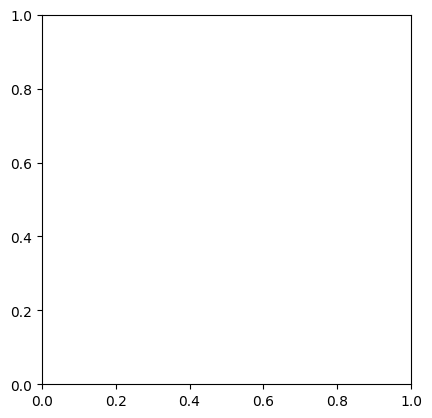

In [11]:
# code for gradio ui 
import gradio as gr
from keras.models import load_model
from patchify import patchify, unpatchify
import numpy as np
import cv2
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Define colors for classes
class_building = np.array([60, 16, 152])
class_land = np.array([132, 41, 246])
class_road = np.array([110, 193, 228])
class_vegetation = np.array([254, 221, 58])
class_water = np.array([226, 169, 41])
class_unlabeled = np.array([155, 155, 155])

# Number of classes in your segmentation task
total_classes = 6  # Update this with your total number of classes

# Define custom loss functions
def jaccard_coef(y_true, y_pred):
    smooth = 1e-12
    intersection = K.sum(K.abs(y_true * y_pred), axis=[1,2,3])
    union = K.sum(y_true,[1,2,3])+K.sum(y_pred,[1,2,3])-intersection
    jac = K.mean((intersection + smooth) / (union + smooth), axis=0)
    return jac

def dice_loss(y_true, y_pred):
    smooth = 1e-12
    intersection = K.sum(y_true * y_pred, axis=[1,2,3])
    union = K.sum(y_true, axis=[1,2,3]) + K.sum(y_pred, axis=[1,2,3])
    dice = K.mean((2.0 * intersection + smooth) / (union + smooth), axis=0)
    return 1.0 - dice

def focal_loss(y_true, y_pred, alpha=0.25, gamma=2.0):
    y_pred = K.clip(y_pred, K.epsilon(), 1.0 - K.epsilon())
    ce_loss = -y_true * K.log(y_pred)
    weight = alpha * y_true * K.pow((1 - y_pred), gamma)
    fl_loss = ce_loss * weight
    return K.mean(K.sum(fl_loss, axis=-1))

def total_loss(y_true, y_pred):
    return dice_loss(y_true, y_pred) + (1 * focal_loss(y_true, y_pred))

# Load the pre-trained model
model_path = '/content/satmodel.h5'  # Replace with your model path
model = load_model(model_path, custom_objects={'total_loss': total_loss, 'jaccard_coef': jaccard_coef, 'dice_loss': dice_loss, 'focal_loss': focal_loss})

# MinMaxScaler for normalization
minmaxscaler = MinMaxScaler()

# Function to predict the full image
def predict_full_image(image, patch_size, model):
    original_shape = image.shape
    print(f"Original image shape: {original_shape}")

    # Pad image to make its dimensions divisible by the patch size
    pad_height = (patch_size - image.shape[0] % patch_size) % patch_size
    pad_width = (patch_size - image.shape[1] % patch_size) % patch_size
    image = np.pad(image, ((0, pad_height), (0, pad_width), (0, 0)), mode='constant', constant_values=0)
    padded_shape = image.shape
    print(f"Padded image shape: {padded_shape}")

    # Normalize the image
    image = minmaxscaler.fit_transform(image.reshape(-1, image.shape[-1])).reshape(image.shape)

    # Create patches
    patched_images = patchify(image, (patch_size, patch_size, 3), step=patch_size)
    print(f"Patched image shape: {patched_images.shape}")

    predicted_patches = []

    # Predict on each patch
    for i in range(patched_images.shape[0]):
        for j in range(patched_images.shape[1]):
            single_patch = patched_images[i, j, 0]
            single_patch = np.expand_dims(single_patch, axis=0)
            prediction = model.predict(single_patch)
            predicted_patches.append(prediction[0])

    # Reshape predicted patches
    predicted_patches = np.array(predicted_patches)
    print(f"Predicted patches shape: {predicted_patches.shape}")

    predicted_patches = predicted_patches.reshape(patched_images.shape[0], patched_images.shape[1], patch_size, patch_size, total_classes)
    print(f"Reshaped predicted patches shape: {predicted_patches.shape}")

    # Unpatchify the image
    reconstructed_image = np.zeros((padded_shape[0], padded_shape[1], total_classes))
    for i in range(patched_images.shape[0]):
        for j in range(patched_images.shape[1]):
            reconstructed_image[i * patch_size:(i + 1) * patch_size, j * patch_size:(j + 1) * patch_size, :] = predicted_patches[i, j]
    print(f"Reconstructed image shape (with padding): {reconstructed_image.shape}")

    # Remove padding
    reconstructed_image = reconstructed_image[:original_shape[0], :original_shape[1]]
    print(f"Final reconstructed image shape: {reconstructed_image.shape}")

    return reconstructed_image

# Function to process the input image
def process_input_image(input_image):
    image_patch_size = 256
    predicted_full_image = predict_full_image(input_image, image_patch_size, model)

    # Convert the predictions to RGB
    predicted_full_image_rgb = np.zeros_like(input_image)

    # Map the predicted class labels to RGB colors
    predicted_full_image_rgb[predicted_full_image.argmax(axis=-1) == 0] = class_water
    predicted_full_image_rgb[predicted_full_image.argmax(axis=-1) == 1] = class_land
    predicted_full_image_rgb[predicted_full_image.argmax(axis=-1) == 2] = class_road
    predicted_full_image_rgb[predicted_full_image.argmax(axis=-1) == 3] = class_building
    predicted_full_image_rgb[predicted_full_image.argmax(axis=-1) == 4] = class_vegetation
    predicted_full_image_rgb[predicted_full_image.argmax(axis=-1) == 5] = class_unlabeled

    return "Image processed", predicted_full_image_rgb

# Gradio application
my_app = gr.Blocks()
with my_app:
    gr.Markdown("Satellite Image Segmentation Application UI with Gradio")
    with gr.Tabs():
        with gr.TabItem("Select your image"):
            with gr.Row():
                with gr.Column():
                    img_source = gr.Image(label="Please select source Image")
                    source_image_loader = gr.Button("Load above Image")
                with gr.Column():
                    output_label = gr.Label(label="Image Info")
                    img_output = gr.Image(label="Image Output")
    source_image_loader.click(
        process_input_image,
        inputs=[img_source],
        outputs=[output_label, img_output]
    )

# Launch the app
my_app.launch()


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://690c781a20259863e2.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


AttributeError: 'Plot' object has no attribute 'update'

AttributeError: module 'gradio' has no attribute 'inputs'

In [21]:
import gradio as gr
from keras.models import load_model
from patchify import patchify, unpatchify
import numpy as np
import cv2
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Define colors for classes
class_building = np.array([60, 16, 152])
class_land = np.array([132, 41, 246])
class_road = np.array([110, 193, 228])
class_vegetation = np.array([254, 221, 58])
class_water = np.array([226, 169, 41])
class_unlabeled = np.array([155, 155, 155])

# Number of classes in your segmentation task
total_classes = 6  # Update this with your total number of classes

# Define custom loss functions
def jaccard_coef(y_true, y_pred):
    smooth = 1e-12
    intersection = K.sum(K.abs(y_true * y_pred), axis=[1,2,3])
    union = K.sum(y_true,[1,2,3])+K.sum(y_pred,[1,2,3])-intersection
    jac = K.mean((intersection + smooth) / (union + smooth), axis=0)
    return jac

def dice_loss(y_true, y_pred):
    smooth = 1e-12
    intersection = K.sum(y_true * y_pred, axis=[1,2,3])
    union = K.sum(y_true, axis=[1,2,3]) + K.sum(y_pred, axis=[1,2,3])
    dice = K.mean((2.0 * intersection + smooth) / (union + smooth), axis=0)
    return 1.0 - dice

def focal_loss(y_true, y_pred, alpha=0.25, gamma=2.0):
    y_pred = K.clip(y_pred, K.epsilon(), 1.0 - K.epsilon())
    ce_loss = -y_true * K.log(y_pred)
    weight = alpha * y_true * K.pow((1 - y_pred), gamma)
    fl_loss = ce_loss * weight
    return K.mean(K.sum(fl_loss, axis=-1))

def total_loss(y_true, y_pred):
    return dice_loss(y_true, y_pred) + (1 * focal_loss(y_true, y_pred))

# Load the pre-trained model
model_path = '/content/satmodel.h5'  # Replace with your model path
model = load_model(model_path, custom_objects={'total_loss': total_loss, 'jaccard_coef': jaccard_coef, 'dice_loss': dice_loss, 'focal_loss': focal_loss})

# MinMaxScaler for normalization
minmaxscaler = MinMaxScaler()

# Function to predict the full image
def predict_full_image(image, patch_size, model):
    original_shape = image.shape
    print(f"Original image shape: {original_shape}")

    # Pad image to make its dimensions divisible by the patch size
    pad_height = (patch_size - image.shape[0] % patch_size) % patch_size
    pad_width = (patch_size - image.shape[1] % patch_size) % patch_size
    image = np.pad(image, ((0, pad_height), (0, pad_width), (0, 0)), mode='constant', constant_values=0)
    padded_shape = image.shape
    print(f"Padded image shape: {padded_shape}")

    # Normalize the image
    image = minmaxscaler.fit_transform(image.reshape(-1, image.shape[-1])).reshape(image.shape)

    # Create patches
    patched_images = patchify(image, (patch_size, patch_size, 3), step=patch_size)
    print(f"Patched image shape: {patched_images.shape}")

    predicted_patches = []

    # Predict on each patch
    for i in range(patched_images.shape[0]):
        for j in range(patched_images.shape[1]):
            single_patch = patched_images[i, j, 0]
            single_patch = np.expand_dims(single_patch, axis=0)
            prediction = model.predict(single_patch)
            predicted_patches.append(prediction[0])

    # Reshape predicted patches
    predicted_patches = np.array(predicted_patches)
    print(f"Predicted patches shape: {predicted_patches.shape}")

    predicted_patches = predicted_patches.reshape(patched_images.shape[0], patched_images.shape[1], patch_size, patch_size, total_classes)
    print(f"Reshaped predicted patches shape: {predicted_patches.shape}")

    # Unpatchify the image
    reconstructed_image = np.zeros((padded_shape[0], padded_shape[1], total_classes))
    for i in range(patched_images.shape[0]):
        for j in range(patched_images.shape[1]):
            reconstructed_image[i * patch_size:(i + 1) * patch_size, j * patch_size:(j + 1) * patch_size, :] = predicted_patches[i, j]
    print(f"Reconstructed image shape (with padding): {reconstructed_image.shape}")

    # Remove padding
    reconstructed_image = reconstructed_image[:original_shape[0], :original_shape[1]]
    print(f"Final reconstructed image shape: {reconstructed_image.shape}")

    return reconstructed_image

# Function to process the input image
def process_input_image(input_image):
    image_patch_size = 256
    predicted_full_image = predict_full_image(input_image, image_patch_size, model)

    # Convert the predictions to RGB
    predicted_full_image_rgb = np.zeros_like(input_image)

    # Map the predicted class labels to RGB colors
    predicted_full_image_rgb[predicted_full_image.argmax(axis=-1) == 0] = class_water
    predicted_full_image_rgb[predicted_full_image.argmax(axis=-1) == 1] = class_land
    predicted_full_image_rgb[predicted_full_image.argmax(axis=-1) == 2] = class_road
    predicted_full_image_rgb[predicted_full_image.argmax(axis=-1) == 3] = class_building
    predicted_full_image_rgb[predicted_full_image.argmax(axis=-1) == 4] = class_vegetation
    predicted_full_image_rgb[predicted_full_image.argmax(axis=-1) == 5] = class_unlabeled

    return "Image processed", predicted_full_image_rgb

# Gradio application
my_app = gr.Blocks()
with my_app:
    gr.Markdown("Satellite Image Segmentation Application UI with Gradio")
    gr.Markdown("Building: #3C1098,Land (unpaved area): #8429F6,Road: #6EC1E4,Vegetation: #FEDD3A,Water: #E2A929,Unlabeled: #9B9B9B")
    gr.Markdown("Building: Purple,Land (unpaved area): Violet,Road:Blue,Vegetation: Gold/yellow,Water: Copper,Unlabeled: Gray")
    with gr.Tabs():
        with gr.TabItem("Select your image"):
            with gr.Row():
                with gr.Column():
                    img_source = gr.Image(label="Please select source Image")
                    source_image_loader = gr.Button("Load above Image")
                with gr.Column():
                    output_label = gr.Label(label="Prediction Image Info ")
                    img_output = gr.Image(label="Image Output")
    source_image_loader.click(
        process_input_image,
        inputs=[img_source],
        outputs=[output_label, img_output]
    )

# Launch the app
my_app.launch()


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://3890e3c37693865b2d.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
